We import the drive to be able to obtain the directories in which the dataset finds itself in.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Machine Learning/Datasets/Chess Data Set/Chessman-image-dataset/Chess"
!ls

/content/drive/MyDrive/Machine Learning/Datasets/Chess Data Set/Chessman-image-dataset/Chess
images


# Splitting Folders
We split the folders using the split-folders library, first installing it with pip, then specify parameters within the function. 

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

splitfolders.ratio('images', output = 'output',seed=1337,ratio=(0.7,0.10,0.20))

Copying files: 556 files [01:25,  6.51 files/s]


# Data Augmentation

We begin the data augmentation process with the help of tensorflow, in order to generate new images to RAM, we use it's Image Generator, to generate new images for the data Augmentation Process.
base_dir acts as our base directories to take the base images from to then augment, with train and test being the directories for our testing data and our training data, same with validation.

train_Datagen is the ImageGenerator, where we give it certrain parameters that alter the given images.

The imported libraries help with "plotting" the image, as well as management of files with os, and finally numpy for numerical operations.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


base_dir = 'output'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'val')

train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 100,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True)

The following code shows one image being modified, taking our train directory as it's base of generation. 

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 1,
							class_mode ='categorical',
							)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

With the following code we take 8 images and we modify them 1 time. 

Found 8 images belonging to 2 classes.
(8, 150, 150, 3)
[0. 0. 1. 1. 0. 0. 1. 1.]


<Figure size 640x480 with 0 Axes>

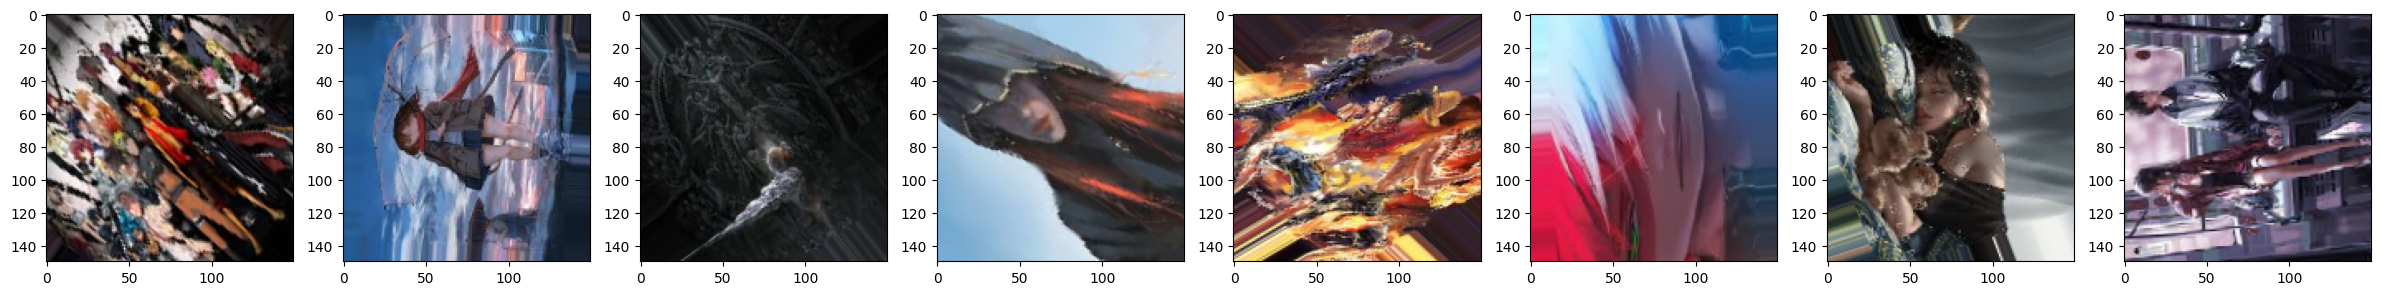

In [ ]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

We set up a way in which we can store our augmented images in the hard disk. Modify parameters at will for better results.

In [ ]:
path = "/content/drive/MyDrive/Machine Learning/Datasets/Chess Data Set/Chessman-image-dataset/Chess"

train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='categorical',
							save_to_dir= path + '/augmented',
              save_prefix='aug',
              save_format='png'
							)

Found 8 images belonging to 2 classes.
